<a href="https://colab.research.google.com/github/Tyler9937/DS-Unit-2-Linear-Models/blob/master/(U2W1A4)assignment_regression_classification_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

# Logistic Regression


## Assignment 🌯

You'll use a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/). How accurately can you predict whether a burrito is rated 'Great'?

> We have developed a 10-dimensional system for rating the burritos in San Diego. ... Generate models for what makes a burrito great and investigate correlations in its dimensions.

- [x] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
- [x] Begin with baselines for classification.
- [ ] Use scikit-learn for logistic regression.
- [ ] Get your model's validation accuracy. (Multiple times if you try multiple iterations.)
- [ ] Get your model's test accuracy. (One time, at the end.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

- [ ] Add your own stretch goal(s) !
- [ ] Make exploratory visualizations.
- [ ] Do one-hot encoding.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Get and plot your coefficients.
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
# Load data downloaded from https://srcole.github.io/100burritos/
import pandas as pd
df = pd.read_csv(DATA_PATH+'burritos/burritos.csv')

In [0]:
# Derive binary classification target:
# We define a 'Great' burrito as having an
# overall rating of 4 or higher, on a 5 point scale.
# Drop unrated burritos.
df = df.dropna(subset=['overall'])
df['Great'] = df['overall'] >= 4

In [0]:
# Clean/combine the Burrito categories
df['Burrito'] = df['Burrito'].str.lower()

california = df['Burrito'].str.contains('california')
asada = df['Burrito'].str.contains('asada')
surf = df['Burrito'].str.contains('surf')
carnitas = df['Burrito'].str.contains('carnitas')

df.loc[california, 'Burrito'] = 'California'
df.loc[asada, 'Burrito'] = 'Asada'
df.loc[surf, 'Burrito'] = 'Surf & Turf'
df.loc[carnitas, 'Burrito'] = 'Carnitas'
df.loc[~california & ~asada & ~surf & ~carnitas, 'Burrito'] = 'Other'

In [0]:
# Drop some high cardinality categoricals
df = df.drop(columns=['Notes', 'Location', 'Reviewer', 'Address', 'URL', 'Neighborhood'])

In [0]:
# Drop some columns to prevent "leakage"
df = df.drop(columns=['Rec', 'overall'])

In [50]:
df.tail()

,Burrito,Date,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
418,Other,8/27/2019,NaN,NaN,NaN,6.0,1.0,NaN,NaN,17.0,20.5,0.57,5.0,4.0,3.5,NaN,4.0,4.0,2.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
419,Other,8/27/2019,NaN,NaN,NaN,6.0,4.0,NaN,NaN,19.0,26.0,1.02,4.0,5.0,NaN,3.5,4.0,4.0,5.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
420,California,8/27/2019,NaN,NaN,NaN,7.9,3.0,NaN,NaN,20.0,22.0,0.77,4.0,4.0,4.0,3.7,3.0,2.0,3.5,4.0,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
421,Other,8/27/2019,NaN,NaN,NaN,7.9,3.0,NaN,NaN,22.5,24.5,1.07,5.0,2.0,5.0,5.0,5.0,2.0,5.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
422,Other,8/27/2019,NaN,NaN,NaN,5.5,3.5,NaN,NaN,17.0,21.3,0.61,3.0,5.0,4.3,4.0,4.9,3.8,3.0,4.5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [0]:
#Seperating data into train validation and test sets
train  = df[df['Date'].str.contains('2016|2015')]
val = df[df['Date'].str.contains('2017')]
test  = df[df['Date'].str.contains('2018|2019')]

In [58]:
#Beginning with baselines for classification
target = 'Great'
y_train = train[target]
y_train.value_counts(normalize=True)

False    0.589226
True     0.410774
Name: Great, dtype: float64

In [0]:
###############################

In [60]:
# Just curious with using majoritey class
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)

# Training accuracy of majority class baseline = 
# frequency of majority class (aka base rate)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.5892255892255892

In [61]:
# Validation accuracy of majority class baseline = 
# usually similar to Train accuracy
y_val = val[target]
y_pred = [majority_class] * len(y_val)
accuracy_score(y_val, y_pred)

0.5529411764705883

In [0]:
######################################

In [67]:
#Arrange X feature matrices (already did y target vectors)
features = ['Length', 'Temp', 'Meat']
x_train = train[features]
x_val = val[features]

#Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
x_train_imputed = imputer.fit_transform(x_train)
x_val_imputed = imputer.transform(x_val)

#using sklearn for logistic regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(x_train_imputed, y_train)
print('Validation Accuracy', log_reg.score(x_val_imputed, y_val))

Validation Accuracy 0.7764705882352941


In [0]:
########################################

In [81]:
test_case = [[7,2,2]]
log_reg.predict(test_case)

array([False])

In [83]:
print('Is the Predicted Burrito Great?:', log_reg.predict(test_case))

Is the Predicted Burrito Great?: [False]


In [84]:
log_reg.predict_proba(test_case)

array([[9.99065210e-01, 9.34789726e-04]])

In [0]:
###########################################

In [194]:
#Using sklearn.linear_model.LogisticRegression to fit and interpret Logistic Regression of Burritos
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

features = ['Tortilla','Meat','Temp','Fillings','Meat:filling','Salsa','Synergy']
target = 'Great'
x_train = train[features]
y_train = train[target]
x_val = val[features]
y_val = val[target]

x_test = test[features]
y_test = test[target]

x_train.shape, y_train.shape, x_val.shape, y_val.shape

((297, 7), (297,), (85, 7), (85,))

In [0]:
#Using one Hot Encoding

In [0]:
encoder = ce.OneHotEncoder(use_cat_names=True)
x_train_encoded = encoder.fit_transform(x_train)
x_val_encoded = encoder.transform(x_val)
x_test_encoded = encoder.transform(x_test)

In [0]:
#Using simple imputer to fill NaN values
imputer = SimpleImputer()
x_train_imputed = imputer.fit_transform(x_train_encoded)
x_val_imputed = imputer.transform(x_val_encoded)
x_test_imputed = imputer.transform(x_test_encoded)

In [0]:
#using standardscaler to scale the datasets for logistic regression
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_val_scaled = scaler.transform(x_val_imputed)
x_test_scaled = scaler.transform(x_test_imputed)

In [199]:
model = LogisticRegressionCV(cv=5, n_jobs=-1, random_state=42)
model.fit(x_train_scaled, y_train)
print('Validation Accuracy', model.score(x_val_scaled, y_val))

Validation Accuracy 0.8705882352941177


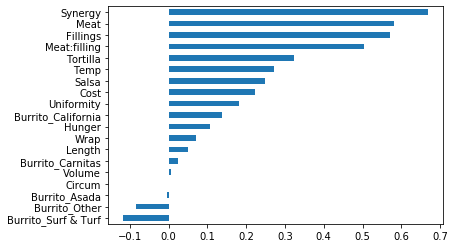

In [103]:
%matplotlib inline
coefficients = pd.Series(model.coef_[0], x_train_encoded.columns)
coefficients.sort_values().plot.barh();

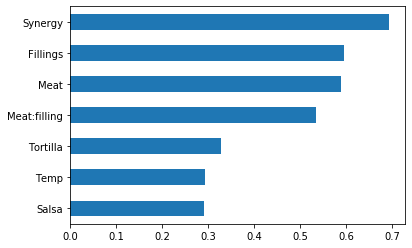

In [200]:
%matplotlib inline
coefficients = pd.Series(model.coef_[0], x_train_encoded.columns)
coefficients.sort_values().plot.barh();

In [192]:
#looking at the test data's accuracy
print('Test Datas Acuraccy:', model.score(x_test_scaled, y_test))

Test Datas Acuraccy: 0.7297297297297297
